In [162]:
import pandas as pd

data = pd.read_csv('mushroom.csv', header=None)
data = data.drop(11, axis=1)
data = pd.get_dummies(data)

In [163]:
y = data['0_e']
X = data.drop(['0_e', '0_p'], axis=1)

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=0)
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(6499, 112)
(1625, 112)
(6499,)
(1625,)


In [165]:
from sklearn import svm

clf = svm.LinearSVC()
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [166]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

X_test[0:1]

,1_b,1_c,1_f,1_k,1_s,1_x,2_f,2_g,2_s,2_y,...,21_s,21_v,21_y,22_d,22_g,22_l,22_m,22_p,22_u,22_w
380,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [167]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

array([[-1.14550996, -0.3984332 ],
       [-1.40184581,  0.5431458 ],
       [-1.55302201,  0.30024491],
       ..., 
       [-0.55712335,  0.20562428],
       [ 1.34417655, -1.8856584 ],
       [-0.51837135,  0.22730996]])

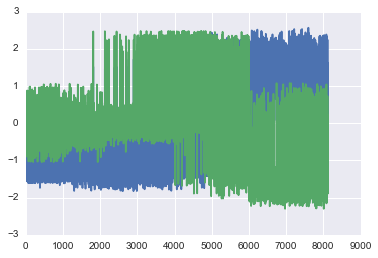

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_pca)
X_pca

In [169]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X.shape[1] / 48)
pca.fit(X)
X_pca = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=0)

from sklearn import svm

clf = svm.LinearSVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[773,   0],
       [  0, 852]])

In [219]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

#clf = DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X, y)
print clf.feature_importances_.shape
print X.shape
print pd.Series(clf.feature_importances_).describe()
print clf.feature_importances_
X_important = np.where(clf.feature_importances_ >= 0.05)
print X[X_important[0]].shape
# print X_important

(112,)
(8124, 112)
count    112.000000
mean       0.008929
std        0.020613
min        0.000000
25%        0.000432
50%        0.001798
75%        0.008620
max        0.173765
dtype: float64
[  4.51092171e-03   1.84589172e-04   1.37059483e-03   2.54455031e-04
   1.87581162e-04   7.71966081e-04   3.32066068e-03   3.47064461e-04
   3.87878390e-03   1.10589175e-03   3.26309362e-03   5.23847226e-04
   9.20993920e-04   1.58090271e-03   1.10402405e-03   1.18486918e-03
   1.75448376e-04   9.93271480e-05   1.91202323e-03   4.40841615e-03
   2.68307992e-02   3.20922678e-02   9.71144536e-03   1.09501554e-02
   6.39056127e-02   9.02093818e-03   8.45355614e-04   1.73764856e-01
   1.32619145e-02   3.15269997e-03   2.44513672e-03   4.15669666e-04
   1.45931706e-04   1.85358812e-02   1.40427644e-02   6.46625134e-02
   4.90837372e-02   5.46439968e-02   1.01755811e-04   1.38951634e-03
   1.15088854e-03   4.80554119e-05   1.77342167e-03   0.00000000e+00
   9.41809610e-04   1.95956370e-03   3.92260729

In [220]:
X_train, X_test, y_train, y_test = train_test_split(
     X[X_important[0]], y, test_size=0.2, random_state=0)

from sklearn import svm

clf = svm.LinearSVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[755,  18],
       [ 59, 793]])